# Предсказание цен на жильё в Бостоне

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
df = load_boston()
print(df['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(df['data'], columns=df['feature_names'])
y = df['target']

X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Распределение признаков в df

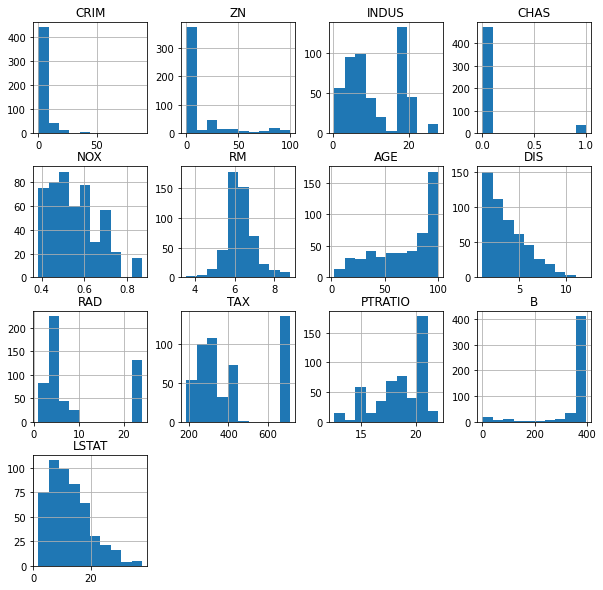

In [6]:
X.hist(X.columns, figsize=(10, 10));

# Мультиколинеарность

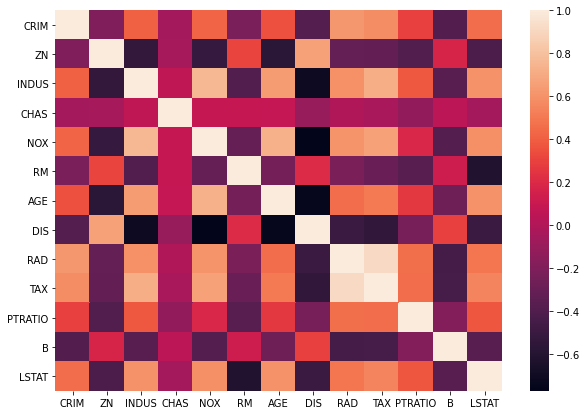

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(X.corr());

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Приводим данные к одному и тому же масштабу

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [30]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

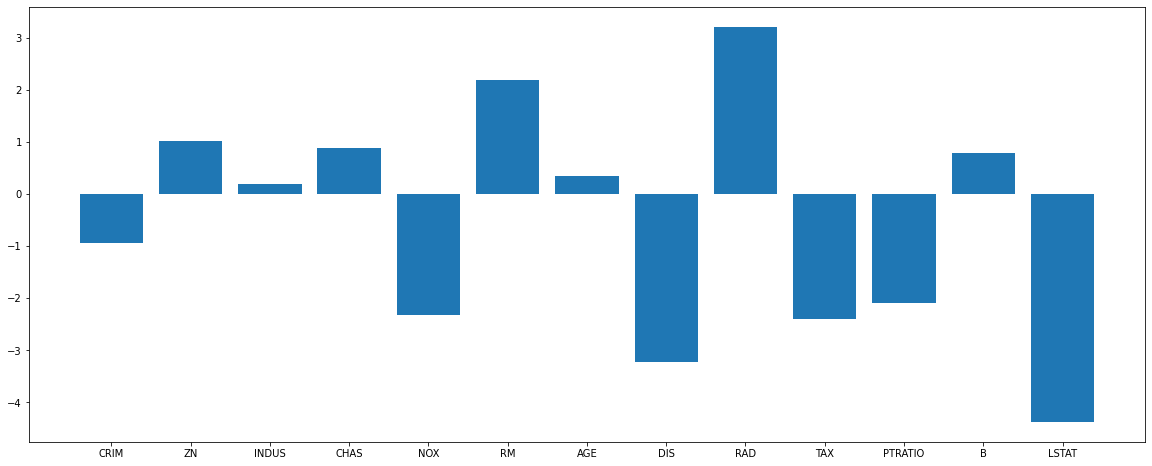

In [33]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_);

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
print(f"Train MSE:{mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE:{mean_squared_error(y_test, y_test_pred)}")

Train MSE:24.051932098413698
Test MSE:17.843552605330704


In [37]:
print(f"Train MAE:{mean_absolute_error(y_train, y_train_pred)}")
print(f"Test MAE:{mean_absolute_error(y_test, y_test_pred)}")

Train MAE:3.4778542825842673
Test MAE:3.154272487484141


In [39]:
y.mean()

22.532806324110677

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
result = cross_val_score(estimator=LinearRegression(), X=X, y=y, scoring='neg_mean_absolute_error')

In [42]:
result

array([-2.62190565, -3.90725478, -4.386606  , -5.57073637, -4.76333993])

In [45]:
print(f"Mean MAE: {result.mean()}, стандартное отклонение MAE {result.std()}")

Mean MAE: -4.24996854419253, стандартное отклонение MAE 0.9792537069067357
